# Advanced Health Analytics Functions

Comprehensive notebook with additional data science functions for health analytics testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Advanced Health Analytics Functions

def calculate_waist_to_hip_ratio(waist_cm, hip_cm):
    """Calculate waist-to-hip ratio (health risk indicator)"""
    return waist_cm / hip_cm

def calculate_vo2_max(heart_rate_max, age, resting_hr):
    """Estimate VO2 max using Karvonen formula"""
    return (heart_rate_max - resting_hr) * 0.7

def calculate_blood_pressure_category(systolic, diastolic):
    """Classify blood pressure into health categories"""
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif systolic < 130 and diastolic < 80:
        return 'Elevated'
    elif systolic < 140 or diastolic < 90:
        return 'Stage 1 Hypertension'
    else:
        return 'Stage 2 Hypertension'

def calculate_fasting_glucose_risk(glucose_level):
    """Assess fasting glucose risk level"""
    if glucose_level < 100:
        return 'Normal'
    elif glucose_level < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

def calculate_metabolic_equivalent(duration_min, mets_value=3.5):
    """Calculate total energy expenditure in METs"""
    return duration_min * mets_value

def calculate_body_fat_percentage(bmi, age, gender):
    """Estimate body fat percentage using Deurenberg equation"""
    if gender.lower() == 'male':
        body_fat = (1.20 * bmi) + (0.23 * age) - 16.2
    else:
        body_fat = (1.20 * bmi) + (0.23 * age) - 5.4
    return max(0, body_fat)  # Ensure non-negative

print("Advanced functions loaded successfully!")

Advanced functions loaded successfully!


In [3]:
# Generate more comprehensive health dataset
np.random.seed(123)
n_samples = 100

health_data = {
    'patient_id': range(1, n_samples + 1),
    'age': np.random.randint(18, 80, n_samples),
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'weight_kg': np.random.normal(75, 18, n_samples),
    'height_m': np.random.normal(1.70, 0.1, n_samples),
    'waist_cm': np.random.normal(85, 15, n_samples),
    'hip_cm': np.random.normal(95, 12, n_samples),
    'systolic_bp': np.random.normal(120, 15, n_samples),
    'diastolic_bp': np.random.normal(80, 10, n_samples),
    'fasting_glucose': np.random.normal(95, 20, n_samples),
    'resting_hr': np.random.randint(55, 100, n_samples),
    'max_hr': np.random.randint(160, 200, n_samples),
    'weekly_exercise_min': np.random.randint(0, 300, n_samples)
}

df_health = pd.DataFrame(health_data)

# Calculate derived metrics
df_health['bmi'] = df_health['weight_kg'] / (df_health['height_m'] ** 2)
df_health['waist_hip_ratio'] = df_health.apply(
    lambda row: calculate_waist_to_hip_ratio(row['waist_cm'], row['hip_cm']), axis=1
)
df_health['vo2_max'] = df_health.apply(
    lambda row: calculate_vo2_max(row['max_hr'], row['age'], row['resting_hr']), axis=1
)
df_health['bp_category'] = df_health.apply(
    lambda row: calculate_blood_pressure_category(row['systolic_bp'], row['diastolic_bp']), axis=1
)
df_health['glucose_risk'] = df_health['fasting_glucose'].apply(calculate_fasting_glucose_risk)
df_health['body_fat_pct'] = df_health.apply(
    lambda row: calculate_body_fat_percentage(row['bmi'], row['age'], row['gender']), axis=1
)

print(f"Dataset shape: {df_health.shape}")
print(f"\nFirst 5 rows:")
print(df_health.head())

Dataset shape: (100, 19)

First 5 rows:
   patient_id  age  gender  weight_kg  height_m   waist_cm      hip_cm  \
0           1   63  Female  95.703700  1.717719  68.878501  105.667915   
1           2   20  Female  52.187663  1.697003  95.024753  108.932820   
2           3   46    Male  78.258632  1.719958  99.337485   93.815784   
3           4   52  Female  96.201515  1.687388  71.835796   92.420203   
4           5   56  Female  68.969806  1.719702  56.144264   73.714744   

   systolic_bp  diastolic_bp  fasting_glucose  resting_hr  max_hr  \
0    97.448124    105.598502        63.475343          82     176   
1   116.514639     80.349026        92.448757          99     161   
2   107.625119     82.326497        94.450832          94     196   
3   116.147320     96.065968        93.038168          88     170   
4   104.246715     81.687223        64.389742          64     180   

   weekly_exercise_min        bmi  waist_hip_ratio  vo2_max  \
0                  129  32.435782    

In [4]:
# Statistical analysis
print("=== STATISTICAL SUMMARY ===")
print(f"\nDescriptive Statistics:")
print(df_health[['age', 'bmi', 'vo2_max', 'waist_hip_ratio', 'body_fat_pct']].describe())

print(f"\n\nBlood Pressure Categories:")
print(df_health['bp_category'].value_counts())

print(f"\nGlucose Risk Levels:")
print(df_health['glucose_risk'].value_counts())

# Correlation analysis
correlation_cols = ['age', 'bmi', 'waist_hip_ratio', 'resting_hr', 'fasting_glucose', 'body_fat_pct']
corr_matrix = df_health[correlation_cols].corr()
print(f"\n\nTop 3 Correlations with Age:")
print(corr_matrix['age'].sort_values(ascending=False).head(4))

=== STATISTICAL SUMMARY ===

Descriptive Statistics:
              age         bmi    vo2_max  waist_hip_ratio  body_fat_pct
count  100.000000  100.000000  100.00000       100.000000    100.000000
mean    49.360000   26.745959   71.98800         0.884706     32.971950
std     17.835681    7.058439   11.34041         0.176646     10.869092
min     18.000000   10.881494   43.40000         0.496945     11.346537
25%     34.750000   22.357575   64.40000         0.773366     25.408214
50%     50.500000   26.612572   71.75000         0.879310     31.852907
75%     65.000000   31.064676   79.10000         1.000115     40.840643
max     79.000000   49.350228  100.80000         1.450800     64.359640


Blood Pressure Categories:
bp_category
Stage 1 Hypertension    60
Normal                  24
Elevated                15
Stage 2 Hypertension     1
Name: count, dtype: int64

Glucose Risk Levels:
glucose_risk
Normal         65
Prediabetes    29
Diabetes        6
Name: count, dtype: int64


Top 3 C

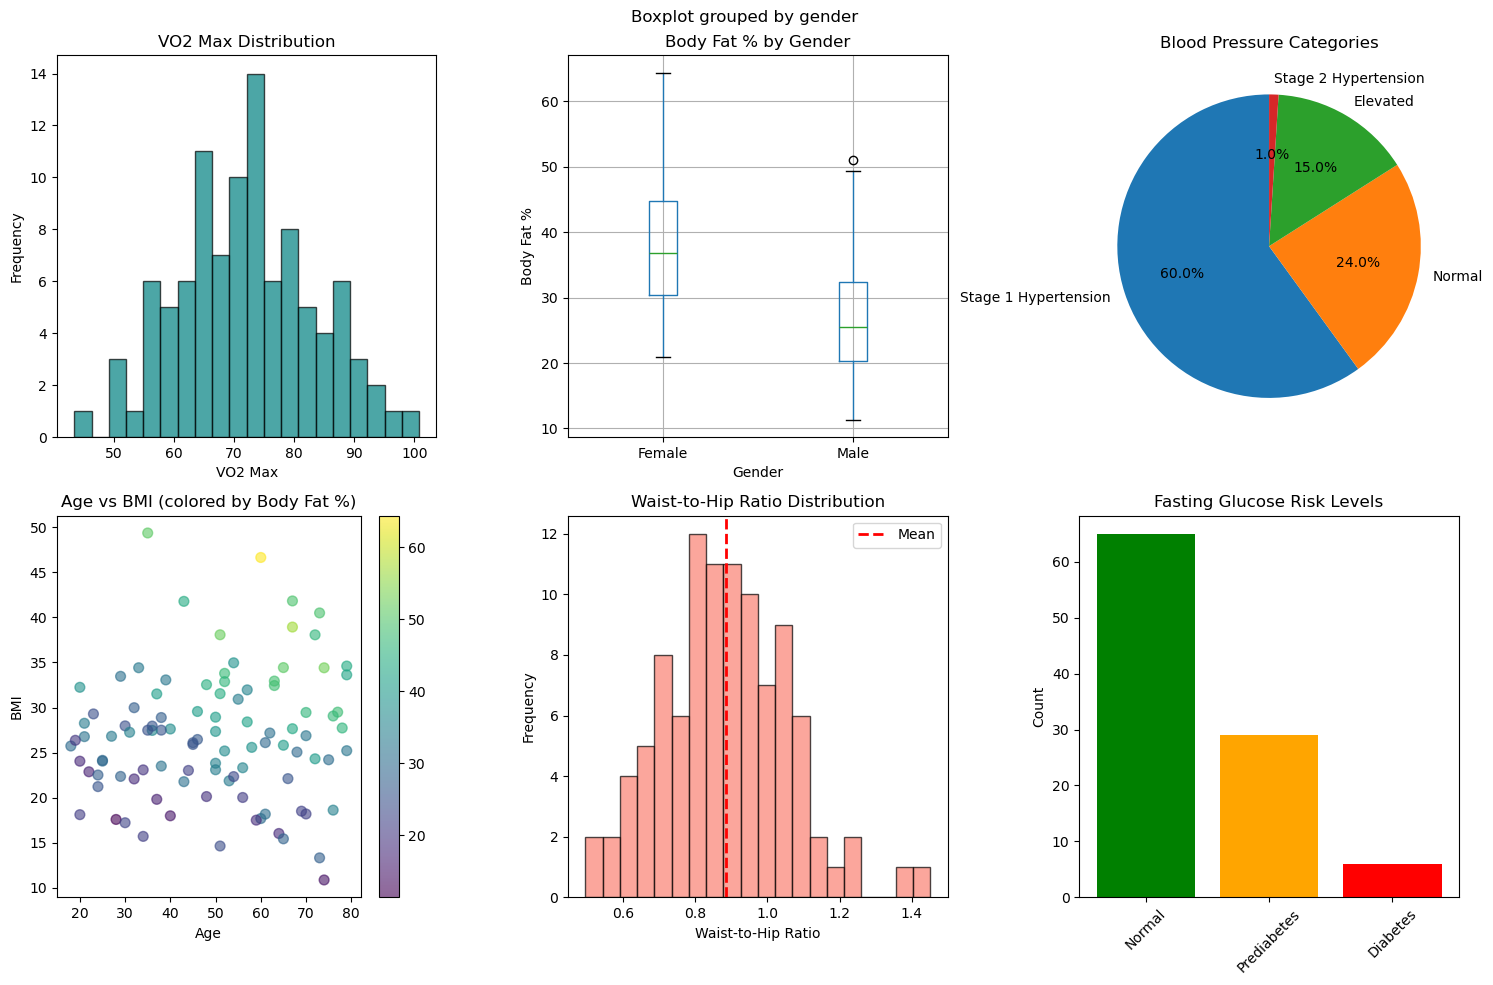

In [5]:
# Advanced visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Health Analytics Dashboard', fontsize=16, fontweight='bold')

# VO2 Max distribution
axes[0, 0].hist(df_health['vo2_max'], bins=20, color='teal', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('VO2 Max Distribution')
axes[0, 0].set_xlabel('VO2 Max')
axes[0, 0].set_ylabel('Frequency')

# Body Fat by Gender
df_health.boxplot(column='body_fat_pct', by='gender', ax=axes[0, 1])
axes[0, 1].set_title('Body Fat % by Gender')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Body Fat %')
plt.sca(axes[0, 1])
plt.xticks(rotation=0)

# Blood Pressure Categories
bp_counts = df_health['bp_category'].value_counts()
axes[0, 2].pie(bp_counts, labels=bp_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Blood Pressure Categories')

# Age vs BMI scatter
scatter = axes[1, 0].scatter(df_health['age'], df_health['bmi'], 
                             c=df_health['body_fat_pct'], cmap='viridis', alpha=0.6, s=50)
axes[1, 0].set_title('Age vs BMI (colored by Body Fat %)')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('BMI')
plt.colorbar(scatter, ax=axes[1, 0])

# Waist-Hip Ratio distribution
axes[1, 1].hist(df_health['waist_hip_ratio'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(df_health['waist_hip_ratio'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[1, 1].set_title('Waist-to-Hip Ratio Distribution')
axes[1, 1].set_xlabel('Waist-to-Hip Ratio')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# Fasting Glucose Risk
glucose_counts = df_health['glucose_risk'].value_counts()
axes[1, 2].bar(glucose_counts.index, glucose_counts.values, color=['green', 'orange', 'red'])
axes[1, 2].set_title('Fasting Glucose Risk Levels')
axes[1, 2].set_ylabel('Count')
plt.sca(axes[1, 2])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

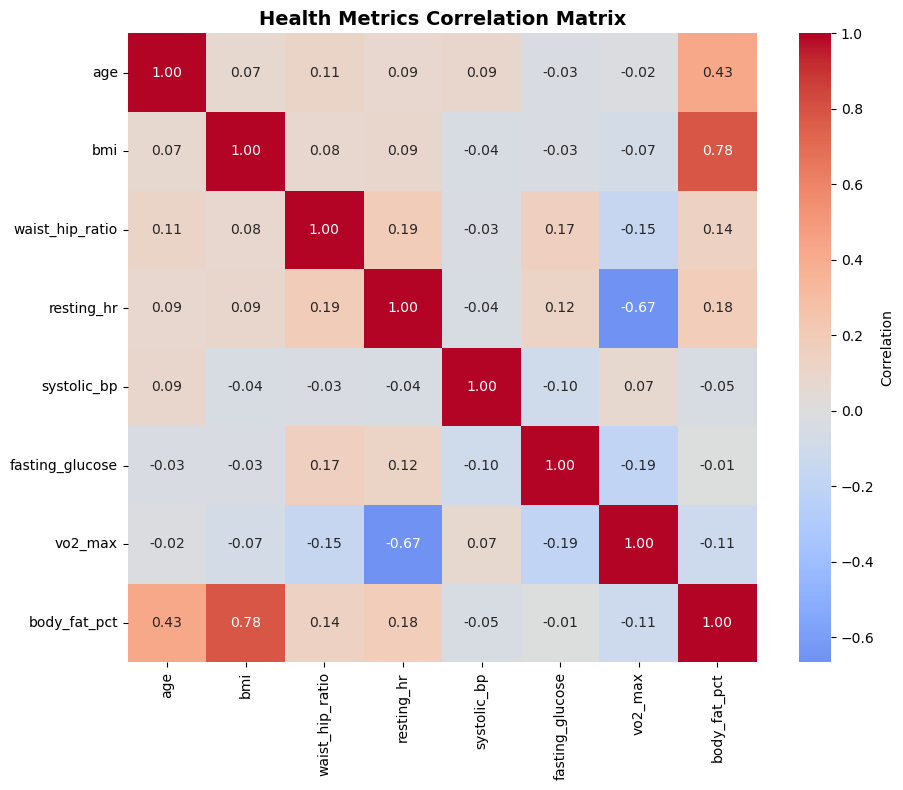

In [6]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
correlation_cols = ['age', 'bmi', 'waist_hip_ratio', 'resting_hr', 'systolic_bp', 'fasting_glucose', 'vo2_max', 'body_fat_pct']
sns.heatmap(df_health[correlation_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, ax=ax, cbar_kws={'label': 'Correlation'})
ax.set_title('Health Metrics Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Statistical hypothesis testing example
male_body_fat = df_health[df_health['gender'] == 'Male']['body_fat_pct']
female_body_fat = df_health[df_health['gender'] == 'Female']['body_fat_pct']

t_stat, p_value = stats.ttest_ind(male_body_fat, female_body_fat)

print("=== HYPOTHESIS TESTING ===")
print(f"\nIndependent T-Test: Male vs Female Body Fat %")
print(f"Male Mean Body Fat: {male_body_fat.mean():.2f}%")
print(f"Female Mean Body Fat: {female_body_fat.mean():.2f}%")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Significant Difference: {'Yes' if p_value < 0.05 else 'No'}")

# Exercise recommendations based on analysis
print(f"\n\n=== EXERCISE ANALYSIS ===")
low_activity = df_health[df_health['weekly_exercise_min'] < 150]
high_activity = df_health[df_health['weekly_exercise_min'] >= 150]

print(f"\nLow Activity Group (< 150 min/week):")
print(f"  Average BMI: {low_activity['bmi'].mean():.2f}")
print(f"  Average Body Fat %: {low_activity['body_fat_pct'].mean():.2f}%")
print(f"  Average VO2 Max: {low_activity['vo2_max'].mean():.2f}")

print(f"\nHigh Activity Group (>= 150 min/week):")
print(f"  Average BMI: {high_activity['bmi'].mean():.2f}")
print(f"  Average Body Fat %: {high_activity['body_fat_pct'].mean():.2f}%")
print(f"  Average VO2 Max: {high_activity['vo2_max'].mean():.2f}")

=== HYPOTHESIS TESTING ===

Independent T-Test: Male vs Female Body Fat %
Male Mean Body Fat: 27.73%
Female Mean Body Fat: 37.62%
T-Statistic: -5.0793
P-Value: 0.0000
Significant Difference: Yes


=== EXERCISE ANALYSIS ===

Low Activity Group (< 150 min/week):
  Average BMI: 26.84
  Average Body Fat %: 33.22%
  Average VO2 Max: 72.15

High Activity Group (>= 150 min/week):
  Average BMI: 26.62
  Average Body Fat %: 32.65%
  Average VO2 Max: 71.77
